# Packages

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get data

In [132]:
data = pd.read_csv('prepared_data.csv', low_memory=False)
original_data = pd.read_csv('prepared_data.csv', low_memory=False)
print(data.head())          # Show the first 5 rows of the dataset   
print(data.info())          # Show the basic information of the dataset
print(data.describe())      # Show the basic statistics of the dataset
print(data.isnull().sum())  # Show the number of missing values in each column

   Unnamed: 0       0       1       2       3       4       5       6       7  \
0          55  30.861  64.936     NaN  55.250  71.469     NaN  45.127     NaN   
1         262  10.424  13.172  12.781  13.573   9.373   8.462   9.753  13.615   
2         263  10.427  13.150  12.946  14.077   9.623   8.857  10.198  13.656   
3         264  10.386  12.993  12.799  14.910  10.533   9.624  11.007  14.044   
4         265  10.796  13.009  12.623  15.555  11.653  10.399  11.542  14.470   

        8  ...      62      63      64      65      66      67      68  \
0  28.935  ...  36.409  75.765  65.944  57.899  54.236  51.704  50.997   
1   6.243  ...   4.560  15.477  13.377  10.951     NaN   3.220   4.663   
2   6.118  ...   4.560  15.577  13.502  11.130     NaN   3.287   4.763   
3   6.102  ...   4.510  15.712  13.650  11.215     NaN   3.242   4.793   
4   5.593  ...   4.482  15.884  13.666  11.143     NaN   3.114   4.633   

       69  cue  activity  
0  49.227    2         0  
1   4.016    2

# About dataset

The following pictures show the correct positions of the electrode clips on the cap. The predefined electrode positions of the cap are Fz, C3, Cz, C4, Pz, PO7, Oz and PO8 according to the 10/20 system. The positions marked as L (for left) and R (for right) are for the Unicorn Sticky Electrodes



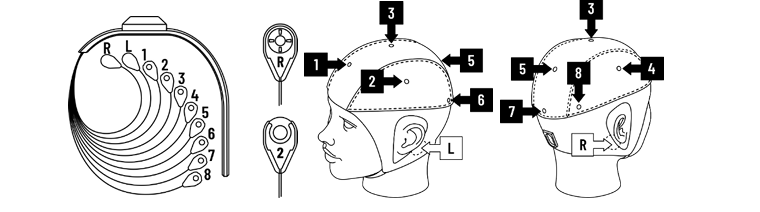

The Unicorn BCI Core-8 is a high-precision data acquisition unit that captures data from 8 EEG channels at 24-bit resolution and transmits it via Bluetooth 5 for seamless connectivity. The Unicorn BCI Core Base connects the Unicorn BCI Core-8 amplifier to the base station and electrodes, ensuring stable signal transmission. It also functions as the power control unit, allowing the device to be turned on and off effortlessly.

About device:
https://www.gtec.at/product/unicorn-bci-core-8-eeg-device-for-high-quality/

The bandpower feature payload sent via UDP is structured as following:
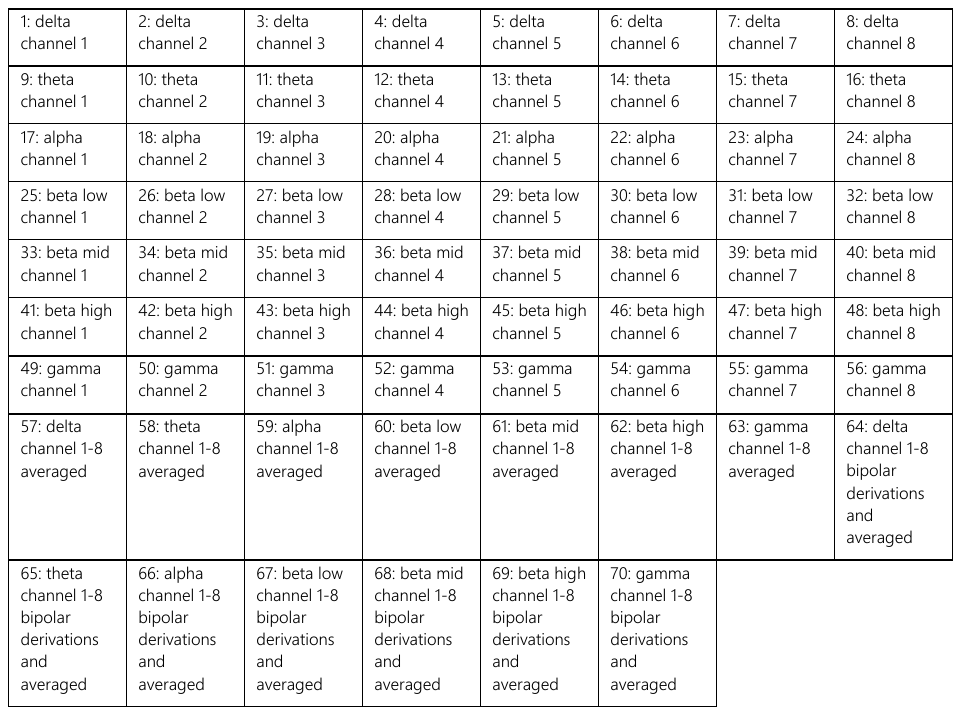

In the dataset, there is a column named 'activity':
0 - No motor imagery
1 - Motor imagery

More info: https://gitlab.com/kn-neuron/okres-wdrozeniowy/wdrozeniowy-jesien-2024/-/blob/main/Data/BNM/UnicornSuite%20%E2%80%94%20kopia.pdf?ref_type=heads


### Motor Imagery

Motor imagery (MI) is the imagined rehearsal of an actual movement.
During motor imagination, a person seems to consciously access motor representation, i.e., the intention of making a movement and a preparation for it, which is usually an operation performed unconsciously.

Moreover, the imagination can be performed using a first (internal) or third (external) person perspective. In the first case, the person should feel like they are performing the imagined movement; in the external perspective, the person should feel like watching themselves while performing the movement.

Furthermore, numerous research studies have found that motor imagery and representation present the same functional relationships and mechanisms, which results in the activation of the same brain areas when performing the actual movement and imagining it.

In fact, analyzing the EEG signals recorded from the primary sensorimotor cortex during the executed or imagined movement of specific body parts, variations in amplitude, mainly of the 𝜇 and 𝛽 rhythms, can be observed. These non-phase-locked-to-the-event variations are called Event-Related Desynchronization and Synchronization (ERD/ERS), corresponding to a decrease or increase in the rhythm’s amplitude, respectively.

Before performing a movement, the 𝜇 and 𝛽 rhythms are subject to an ERD. Instead, the deactivation of the motor cortex due to movement stopping elicits an ERS on the 𝛽 frequency band.

These pieces of evidence justify the supporting role of MI training in motor execution improvement and generally in the enhancement of neuroplasticity, i.e., the brain’s ability to change in response to new conditions. Moreover, the MI-related phenomena can be easily exploited to provide an MI-based control of a BCI system.

However, the MI ability is subjective due to each individual difference, and thus needs to be assessed before being exploited in experiments/applications, or to be trained. Particularly in the field of MI-based BCIs, proper motor imagery task completion may require a long time, and some researchers affirm that a good BCI control is usually achieved when the subject is at least able to perform 70% of the required tasks accurately.


Source: https://www.mdpi.com/1424-8220/23/5/2798

To learn more: https://www.brainaccess.ai/eeg-electroencephalography/
https://medium.com/geekculture/common-spatial-pattern-and-its-applications-in-the-healthcare-industry-faa4311dab79

# Exploratory Data Analysis (EDA)
### TO DO:
Exploratory Data Analysis (EDA) is an analytical approach aimed at uncovering the inherent characteristics of datasets, utilizing statistical and visualization techniques.

TO READ: https://medium.com/data-and-beyond/mastering-exploratory-data-analysis-eda-everything-you-need-to-know-7e3b48d63a95


# Is the dataset balanced - yes or no, and what does that mean for us?

The dataset is unbalanced - there are more "0" (No motor imagery) data than "1" (Motor imagery) data. 
 
Unbalanced data can distort the model results: The model may "learn" to predict only the most frequent class (e.g., 0), ignoring the other classes.


activity
0    56434
1    12408
Name: count, dtype: int64
activity
0    81.976119
1    18.023881
Name: proportion, dtype: float64


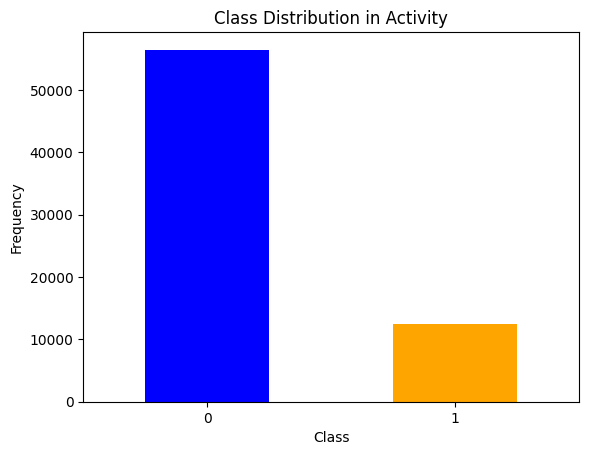

In [133]:
class_counts = data['activity'].value_counts()
print(class_counts)
class_distribution = data['activity'].value_counts(normalize=True) * 100
print(class_distribution)

class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution in Activity')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


# Are there missing values - what does that mean for us?

In some columns, the number of records (count) is less than the total number of rows in the dataset. This indicates the presence of missing values (NaN). It was found that rows with missing values were present in both classes of the target column activity, indicating a random nature of the missing values. Columns such as cue and activity did not contain missing values, meaning that only columns with numerical data needed to be processed. 
 
To fix this and not affect the statistics, we fill the missing values with the median: The median minimally distorts the data distribution as it is not influenced by outliers. Filled the missing values in each numerical column separately with the median values of that column. 
 
We compare the means, medians, and standard deviations before and after filling. The changes were minimal, indicating successful correction of the missing values without significant data distortion. The histogram showed that filling added a peak at the median point, but the main characteristics of the distribution remained unchanged. 
 
Missing values can be caused by various reasons, including technical failures in data collection (e.g., EEG recording equipment malfunctions) or experiment features. Their occurrence can be random, reducing their impact on the analysis, or systematic, requiring more detailed study as they may be related to specific conditions or data classes. Missing values can distort statistics, such as means and variances, and negatively affect model results if not handled correctly. In some cases, missing values themselves can contain important information, such as indicating anomalies in experiments or distinctive patterns.

has_na  activity
False   0           32819
        1            7004
True    0           23615
        1            5404
dtype: int64
Unnamed: 0    0
0             0
1             0
2             0
3             0
             ..
67            0
68            0
69            0
cue           0
activity      0
Length: 73, dtype: int64
             Mean Before    Mean After  Median Before  Median After
Unnamed: 0  62069.630066  62069.630066     62163.5000    62163.5000
0              19.942537     19.927301        19.5230       19.5230
1              20.087814     20.024778        18.3520       18.3520
2              22.162069     22.084861        20.0360       20.0360
3              21.423662     21.346287        19.2930       19.2930
...                  ...           ...            ...           ...
66             12.510477     12.455497        10.9965       10.9965
67              8.784737      8.784737         7.4060        7.4060
68             10.757868     10.703510         9.2610

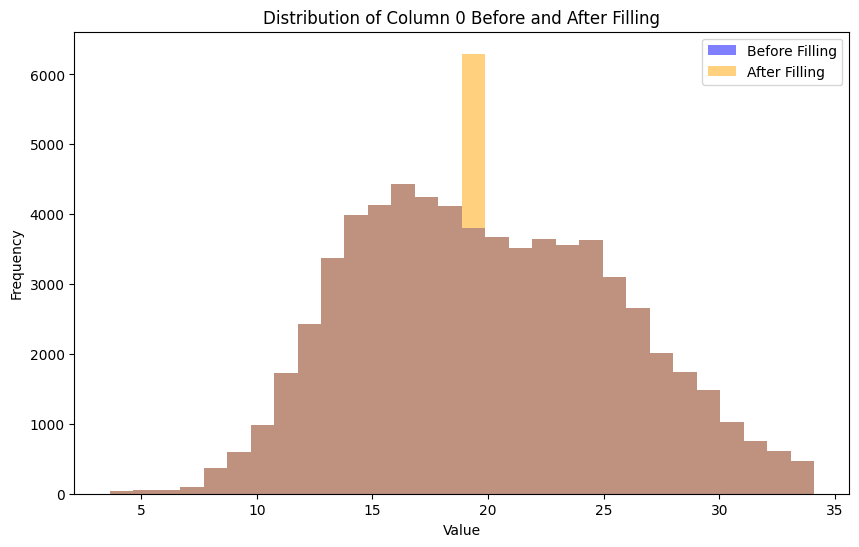

In [134]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())
original_data['has_na'] = original_data.isnull().any(axis=1)
print(original_data.groupby(['has_na', 'activity']).size())
print(data.isnull().sum())

mean_before = original_data[numeric_columns].mean()
median_before = original_data[numeric_columns].median()

mean_after = data[numeric_columns].mean()
median_after = data[numeric_columns].median()

comparison = pd.DataFrame({
    'Mean Before': mean_before,
    'Mean After': mean_after,
    'Median Before': median_before,
    'Median After': median_after
})

print(comparison)

std_before = original_data[numeric_columns].std()
std_after = data[numeric_columns].std()
print(pd.DataFrame({'Std Before': std_before, 'Std After': std_after}))

column = '0'
plt.figure(figsize=(10, 6))

plt.hist(original_data[column].dropna(), bins=30, alpha=0.5, label='Before Filling', color='blue')

plt.hist(data[column], bins=30, alpha=0.5, label='After Filling', color='orange')

plt.title(f"Distribution of Column {column} Before and After Filling")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Generate a plot - data distribution depending on the applied scaling, normalization (e.g., L1 norm), and standardization.

<Figure size 1000x600 with 0 Axes>

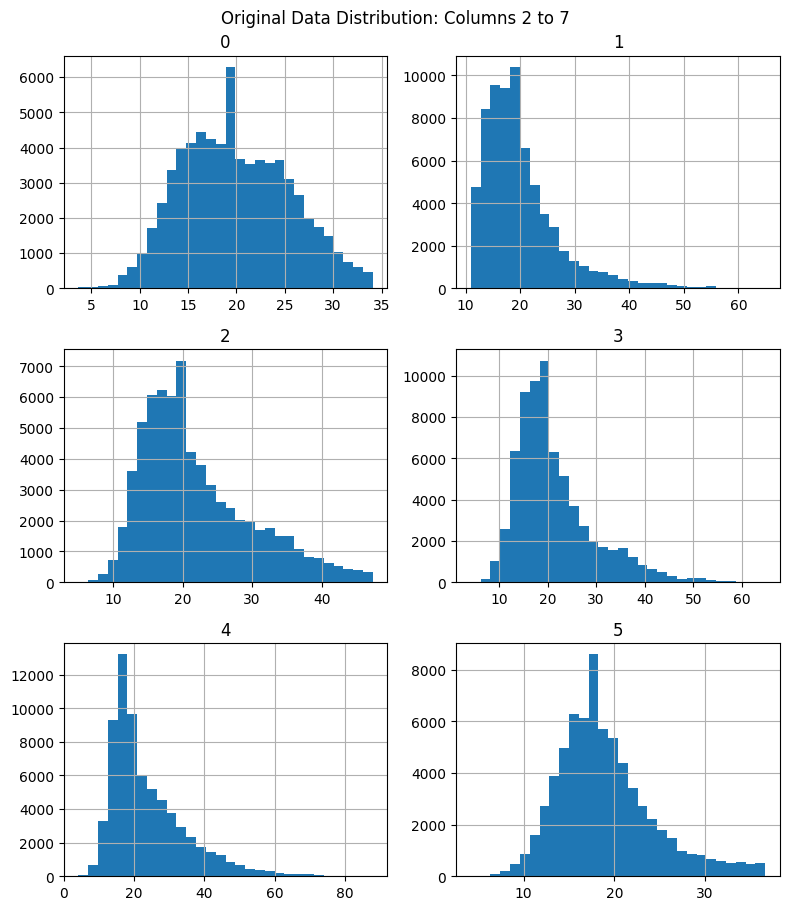

<Figure size 1000x600 with 0 Axes>

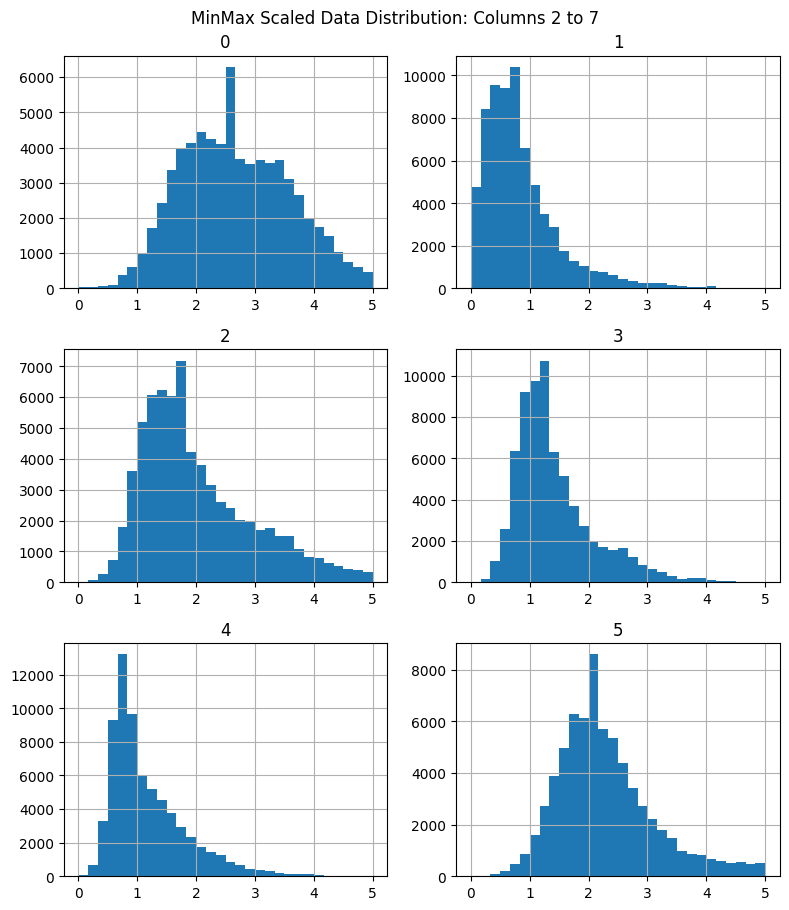

<Figure size 1000x600 with 0 Axes>

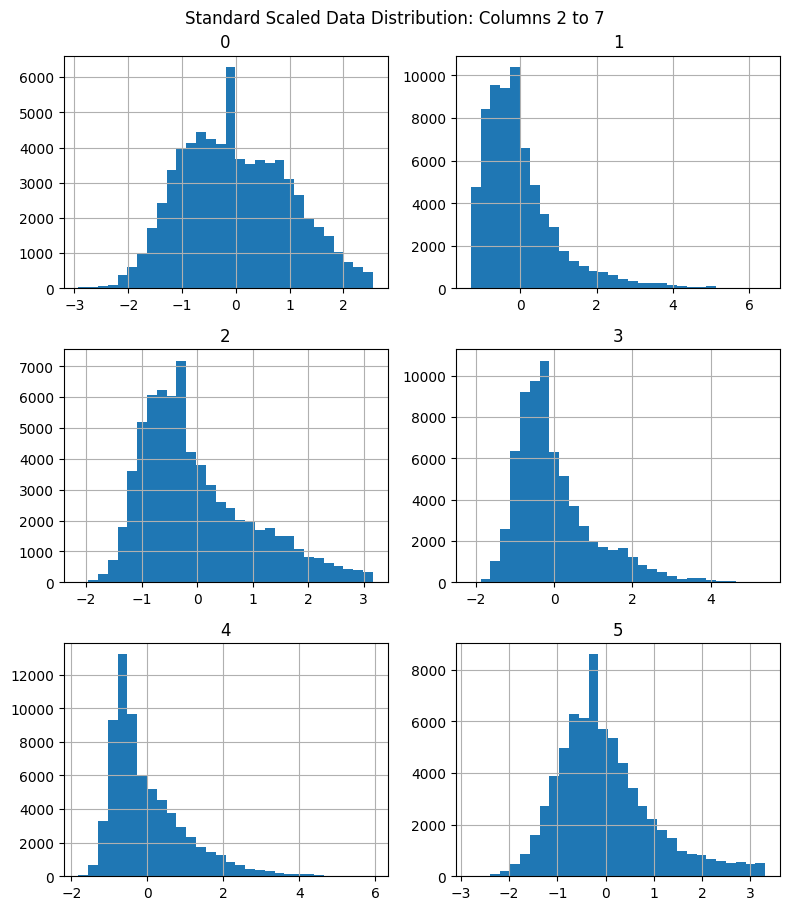

<Figure size 1000x600 with 0 Axes>

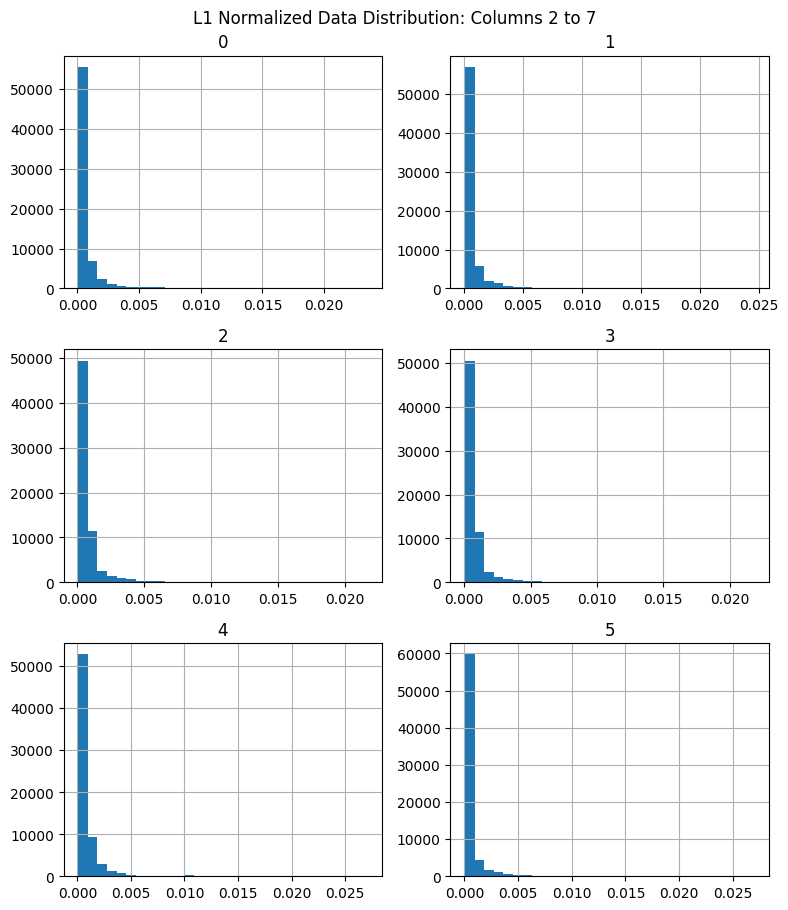

In [135]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

min_val, max_val = 0, 5
minmax_scaled_data = (numeric_data - numeric_data.min()) / (numeric_data.max() - numeric_data.min()) * (max_val - min_val) + min_val

mean = numeric_data.mean()
std = numeric_data.std()
standard_scaled_data = (numeric_data - mean) / std

l1_normalized_data = numeric_data.div(numeric_data.abs().sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))
numeric_data.iloc[:, 1:7].hist(bins=30, layout=(4, 2), figsize=(8, 12))
plt.suptitle(f'Original Data Distribution: Columns 2 to 7')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
minmax_scaled_data.iloc[:, 1:7].hist(bins=30, layout=(4, 2), figsize=(8, 12))
plt.suptitle('MinMax Scaled Data Distribution: Columns 2 to 7')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
standard_scaled_data.iloc[:, 1:7].hist(bins=30, layout=(4, 2), figsize=(8, 12))
plt.suptitle('Standard Scaled Data Distribution: Columns 2 to 7')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
l1_normalized_data.iloc[:, 1:7].hist(bins=30, layout=(4, 2), figsize=(8, 12))
plt.suptitle('L1 Normalized Data Distribution: Columns 2 to 7')
plt.tight_layout()
plt.show()


# Apply PCA and ICA - which is better and why?

PCA:
- Based on maximizing variance.
- Utilizes orthogonal axes (principal components).
- Suitable for datasets where dimensionality needs to be reduced and key directions of variability need to be identified.

ICA:
- Based on maximizing the independence of components.
- Suitable for separating mixed signals (e.g., separating audio streams).
- Effective for signals that are independent but may be linearly mixed.

For our data, ICA would be more useful because it allows us to extract signals from different EEG channels as independent components, given that the signals may overlap. This approach enables better analysis of individual signals.

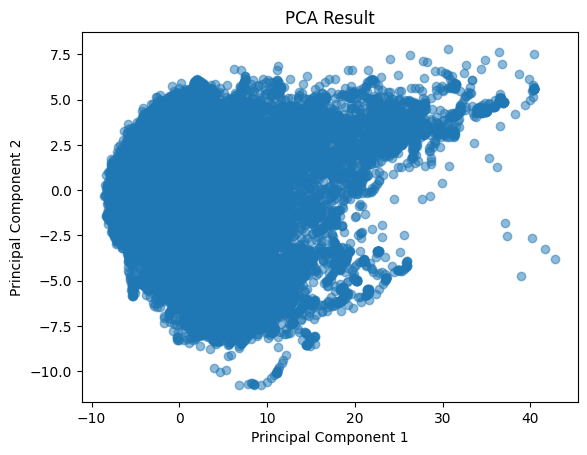

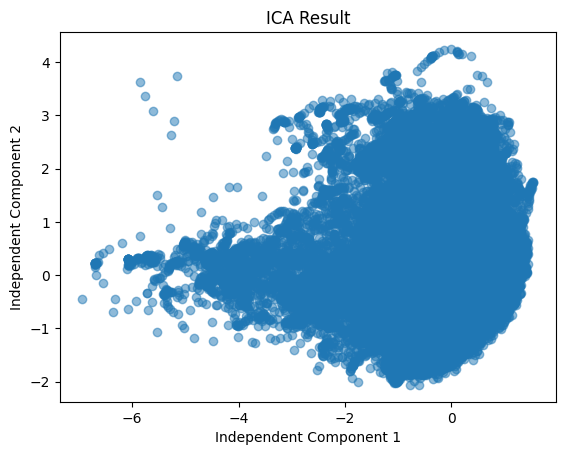

In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

ica = FastICA(n_components=2) 
ica_result = ica.fit_transform(scaled_data)

plt.scatter(ica_result[:, 0], ica_result[:, 1], alpha=0.5)
plt.title('ICA Result')
plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.show()


# Select K best features

- Irrelevant or noisy features that can reduce model accuracy are removed.
- Fewer features mean the model becomes less complex, reducing the risk of overfitting.
- Reducing the number of features decreases the time required to train the model.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

X = numeric_data.drop(columns=['Unnamed: 0', 'activity'])
y = data['activity']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 10
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X_scaled, y)

print("Scores for each feature:", selector.scores_)

selected_indices = selector.get_support(indices=True)
selected_features = numeric_data.columns[selected_indices]
print("Selected features:", selected_features)